[View in Colaboratory](https://colab.research.google.com/github/willz-fortner/Machine-Learning-with-Python/blob/master/Negative_Content_Detector.ipynb)

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
from StringIO import StringIO
unggah_data = files.upload()

Saving datasetw.csv to datasetw.csv


In [3]:
df = pd.read_csv(StringIO(unggah_data['datasetw.csv']))

#mengubah label data menjadi bentuk angka
df['category_id'] = df['category'].factorize()[0]

#menghapus data kosong dari dataset
df.dropna()

,category,content,filename,title,url,category_id
0,judi,Lihat kumpulan daftar nama situs agen judi pok...,datax_0.txt,Kumpulan daftar situs agen judi poker online t...,https://situsagenonline.co\r\n,0
1,judi,Pendatang baru memang tidak punya gambaran bag...,datax_1.txt,TOTOAGUNG.COM - Bandar Togel Terpercaya. Dafta...,https://situsagung.com\r\n,0
2,judi,Togel Online | Bandar Togel | Judi Togel | Age...,datax_10.txt,OnlineTogel777.com,http://onlinetogel777.com\r\n,0
3,judi,Akun Togel SG45 | SG49 | HK | KL | Klik4d Daft...,datax_100.txt,Daftar Akun Togel Online - Daftar Akun Togel O...,http://akuntogelonline.com\r\n,0
4,judi,Situs judi merupakan website untuk permainan b...,datax_1000.txt,Situs Judi Bola | Agen Bola Terbaik Dan Terper...,http://situsjudibola888.com\r\n,0
5,judi,Prediksi Togel Singapura Hari ini 1 Januari 20...,datax_1001.txt,Software Togel Jitu | Prediksi Togel Hari Ini ...,http://softwaretogeljitu.wordpress.com\r\n,0
6,judi,Situs judi merupakan website untuk permainan b...,datax_1002.txt,"Daftar Agent Judi online,judi bola,kasino,poke...",http://situsjudibolaonline888.blogspot.co.id\r\n,0
7,judi,Situs Judi Bola Review | Support by Naga188 wa...,datax_1003.txt,Situs Judi Bola Terpercaya - Situs Judi Bola R...,http://situsjudibolaterpercaya.net\r\n,0
8,judi,Situs Game Online Resmi dan Terpercaya Di Indo...,datax_1004.txt,Situs Judi capsa Susun – Situs Game Online Res...,http://situsjudicapsasusun.wordpress.com\r\n,0
9,judi,Bermain di agen judi baccarat online indonesia...,datax_1005.txt,SITUS JUDI CASINO ONLINE,http://situsjudicasino.online\r\n,0


In [0]:
#hapus data yang berduplikat
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [0]:
#hapus simbol yang berhubungan dengan regex
df['content'] = df['content'].replace('[\/|&.,\'"~]|["\n\r"]', '', regex=True)

In [6]:
df.sample(5)

,category,content,filename,title,url,category_id
3479,whitelist,JAKARTA com Subdit Resmob Dit Reskrimum Pol...,whitelist_209.txt,Polisi Ungkap Prostitusi Online Berkedok Pijat...,http://megapolitan.kompas.com/read/2018/05/06/...,3
944,judi,Situs Judi Online Agen PokerQQ Domino QQ 99 O...,datax_706.txt,Situsqqterbaik : Situs Agen PokerQQ | Domino Q...,http://situsqqterbaik.com\r\n,0
486,judi,Prediksi Togel Forum Togel Agen Togel Syair...,datax_294.txt,SDSBTOGEL - Prediksi Togel | Forum Togel | Age...,http://sdsbtogel.info\r\n,0
2051,porno,mohdidris7279: brotherhoodii: Hijab Horny😍 Ske...,datay_570.txt,kenikmatan,http://nafsu-gadis.tumblr.com\r\n,1
1949,porno,Copyright © 2011 cewek cantik bugil bokep All...,datay_479.txt,cewek cantik bugil bokep,http://cewek-cantik-bugil-bokep.blogspot.co.id...,1


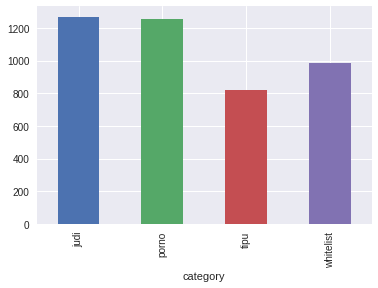

In [7]:
df.groupby('category').filename.count().plot.bar(ylim=0)

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
#Ubah data ke dalam bentuk vector sehingga dapat diproses
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#load stopword untuk bahasa Indonesia
stop = stopwords.words('indonesian')
konten_data = df['content'].fillna(' ')

cv = CountVectorizer(min_df = 5, analyzer = 'word', stop_words = stop, encoding = 'latin1', ngram_range=(1,2))

fitur = cv.fit_transform(konten_data).toarray()
label = df.category_id
fitur.shape

(4337, 62039)

In [11]:
from sklearn.feature_selection import chi2

N = 3
for kategori, id_kategori in sorted(category_to_id.iteritems()):
  fitur_chi2 = chi2(fitur, label == id_kategori)
  indeks = np.argsort(fitur_chi2[0])
  nama_fitur = np.array(cv.get_feature_names())[indeks]
  unigram = [v for v in nama_fitur if len(v.split(' ')) == 1]
  bigram = [v for v in nama_fitur if len(v.split(' ')) == 2]
  print("#'{}' : ".format(kategori))
  print(" . Unigram yang paling berkorelasi :\n   . {}".format('\n     . '.join(unigram[-N:])))
  print(" . Bigram yang paling berkorelasi : \n    . {}".format('\n     . '.join(bigram[-N:])))

#'judi' : 
 . Unigram yang paling berkorelasi :
   . online
     . togel
     . judi
 . Bigram yang paling berkorelasi : 
    . prediksi togel
     . judi bola
     . judi online
#'porno' : 
 . Unigram yang paling berkorelasi :
   . cerita
     . judi
     . bokep
 . Bigram yang paling berkorelasi : 
    . bu nurul
     . download video
     . video bokep
#'tipu' : 
 . Unigram yang paling berkorelasi :
   . kios
     . hadiah
     . pemenang
 . Bigram yang paling berkorelasi : 
    . biaya administrasi
     . pemenang hadiah
     . ptm kios
#'whitelist' : 
 . Unigram yang paling berkorelasi :
   . judi
     . togel
     . online
 . Bigram yang paling berkorelasi : 
    . media sosial
     . judi bola
     . judi online


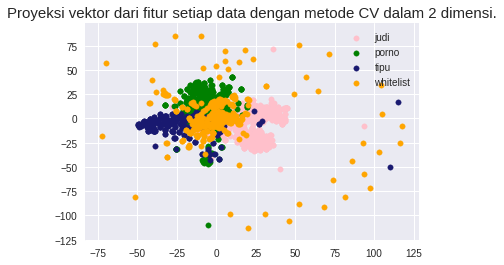

In [12]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(fitur) * 0.3)
np.random.seed(0)
indeks = np.random.choice(range(len(fitur)), size=SAMPLE_SIZE, replace=False)
proyeksi_fitur = TSNE(n_components=2, random_state=0).fit_transform(fitur[indeks])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
for kategori, id_kategori in sorted(category_to_id.iteritems()):
    titik = proyeksi_fitur[(label[indeks] == id_kategori).values]
    plt.scatter(titik[:, 0], titik[:, 1], s=30, c=colors[id_kategori], label=kategori)
plt.title("Proyeksi vektor dari fitur setiap data dengan metode CV dalam 2 dimensi.",
          fontdict=dict(fontsize=15))
plt.legend()

In [13]:
judul = df.title.fillna(' ')
df[judul.str.contains('judi')]

,category,content,filename,title,url,category_id
0,judi,Lihat kumpulan daftar nama situs agen judi pok...,datax_0.txt,Kumpulan daftar situs agen judi poker online t...,https://situsagenonline.co\r\n,0
6,judi,Situs judi merupakan website untuk permainan b...,datax_1002.txt,"Daftar Agent Judi online,judi bola,kasino,poke...",http://situsjudibolaonline888.blogspot.co.id\r\n,0
23,judi,sukabet adalah situs agen judi agen judi bola ...,datax_1018.txt,Sukabet Agen Judi Online | Agen Bola Terperca...,http://sukabet-agen-judi-online.over-blog.com\r\n,0
26,judi,Taruhan Judi Bola adalah Website Judi Bola yan...,datax_1020.txt,Taruhan Judi Bola Tanpa Modal – Memberikan ban...,http://taruhanjudibola99.wordpress.com\r\n,0
40,judi,lucky9casino – dewaasia – Penjaga gawang Azzur...,datax_1033.txt,Website Taruhan Bola Judi Online | website tem...,http://websitetaruhanjudionline.com\r\n,0
180,judi,Permainan togel merupakan permainan yang sanga...,datax_116.txt,situs judi togel online terpercaya | situs jud...,http://bandarjuditogel.net\r\n,0
269,judi,Dapatkan bonus deposit 20% untuk member baru D...,datax_124.txt,Situs Judi Bola Online Terbaik - agen judi spo...,http://situsjudibolaonlineterbaik.com\r\n,0
321,judi,Kami situsjudionlinetips merupakan portal atau...,datax_145.txt,Situs Judi Online | Judi Kartu Online | Agen P...,http://situsjudionline.tips\r\n,0
331,judi,dd +855 7093 0899 QIUQIU 335A3B2F Agen judi on...,datax_154.txt,Situs Judi Online | DominoQQ Online | Poker On...,http://situsjudionline.tk\r\n,0
368,judi,*Jadwal Bisa Berubah Sewaktu-waktu Tergantung ...,datax_188.txt,togel online - prediksi togel - judi togel by ...,http://infodewatogel.net\r\n,0


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import cross_val_score


models = [
    #SVC(kernel = 'linear', C = 1),
    #DecisionTreeClassifier(max_depth = 2),
    GaussianNB(),
    OneVsRestClassifier(LinearSVC(class_weight="balanced")),
    SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42,max_iter=5, tol=None)
                        
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, fitur, label, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


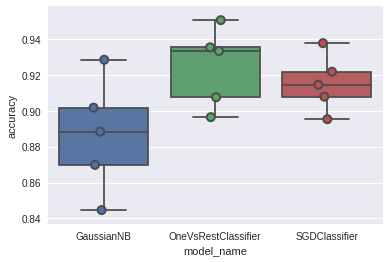

In [15]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [19]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.926213
LogisticRegression    0.938204
MultinomialNB         0.914709
Name: accuracy, dtype: float64

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import cross_val_score


models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    LinearSVC(random_state=0),
    #KNeighborsClassifier(n_neighbors=25)
      
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, fitur, label, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

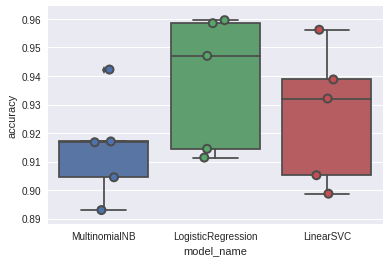

In [21]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [22]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.926213
LogisticRegression    0.938204
MultinomialNB         0.914709
Name: accuracy, dtype: float64

**Multnomial Naive Bayes**

In [0]:
from sklearn.model_selection import train_test_split

model = MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(fitur, label, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_test)
y_pred = model.predict(X_test)

Text(0.5,15,u'Predicted')

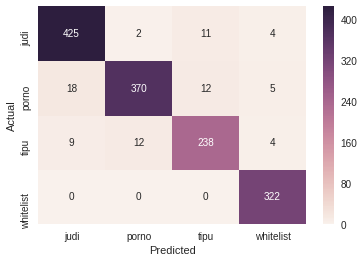

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [48]:
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['title', 'content']])
            print('')

'porno' predicted as 'judi' : 18 examples.


,title,content
1390,Portal Cerita,Informasi terkini berita unik peristiwa terbar...
1563,万博体育客户端-万博苹果客户端-万博安卓客户端,Copyright © 2006 万博体育客户端 闽ICP备15002538号 地址：...
2411,Kumpulan Cerita Mesum,Video Bokepagen bola onlineagen judi bolaagen ...
1728,Database Error,Agen Poker Poker Online Indonesia Judi Poker P...
1861,Warung Cerita Seks,Agen Poker OnlineAgen Poker TerbaikAgen Poker ...
1713,Vimax | Obat Kuat | Alat Bantu Sex - Toko Dewasa,Kami adalah toko online yang khusus menjual pr...
1423,Portal Cerita,Informasi terkini berita unik peristiwa terbar...
1303,CERITA NYATA DEWASA,Cerita Dewasa - Kisah Dewasa - ABG Genit - ABG...
2434,CERITA NYATA DEWASA,Cerita Dewasa - Kisah Dewasa - ABG Genit - ABG...
1271,Warung Cerita Seks,Agen Poker OnlineAgen Poker TerbaikAgen Poker ...



'tipu' predicted as 'judi' : 9 examples.


,title,content
2622,Bandar Judi Taruhan Online Terbesar Dan Terper...,Situs Taruhan Judi Online Terlengkap Dan Terpe...
2617,agen bola terpercaya,Kami Hadir di Pontianak Untuk Menjamin Rasa Am...
2642,PT-SANTOS JAYA ABADI,DIDUKUNG OLEH
2706,Master Forex Pontianak,Kami Hadir di Pontianak Untuk Menjamin Rasa Am...
2623,PT.BANK RAKYAT INDONESIA,Situs Taruhan Judi Online Terlengkap Dan Terpe...
2554,Hantu Promo | Portal Promo Bonus Judi Online,QQFUNBETCOM Situs Free Games Mobile Slot Onlin...
2528,NatureForex – Indonesia,Panduan HUBUNGI KAMI 085749921836 Hari Jam ...
2560,Review agen domino qiu qiu,Pasang Iklan Baris Gratis Premium Banner dan L...
2615,DISKON PEMASANGAN,DISKON TARUHAN DAN HADIAHDISKON DAN HADIAH TOG...



'judi' predicted as 'porno' : 2 examples.


,title,content
156,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
57,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...



'tipu' predicted as 'porno' : 12 examples.


,title,content
2705,PESTA ISI ULANG MOBO INDOSAT 2017,NaN
2783,DAFTAR PEMENANG RESMI UNDIAN BERHADIAH PT M-KI...,NaN
3335,"Andana Zürich: Erotische Massagen, Tantra Mass...",Dear users an exciting time has come to an end...
3106,calpestamento.com - Registered at Namecheap.com,This domain is registered at NamecheapThis dom...
3322,info hadiah isi ulang mkios,NaN
2630,Porn-in-tveriya.blogspot.com: פורנו בטבריה - t...,Sorry the blog you were looking for does not e...
2855,DAPATKAN HADIAH ANDROID ANDA,NaN
3210,PT.Bank Rakyat Indonesia,NaN
3340,foto sesso anale,BISPAKCewek CantikFoto NgentotMesumTanteVideo ...
2984,花蘭咲からんさの口コミには騙されるな！こんな人は効果がありません！,薄毛に悩む女性に大人気の育毛剤「花蘭咲（からんさ）」！ ネットの口コミを見てみても、 ...



'judi' predicted as 'tipu' : 11 examples.


,title,content
214,sukatogelonline.com | 520: Web server is retur...,There is an unknown connection issue between C...
1098,WordPress.com — Get a Free Blog Here,This site has been archived or suspended for a...
220,Oddset | Danske spil | Tips dk | Spilforslag |...,Søg på SpilXperten Det vrimler ikke ligefrem m...
1002,daftarjuditogel - Home,Here you can entera little moreinformation Her...
117,sukatogelonline.com | 520: Web server is retur...,There is an unknown connection issue between C...
1120,judiagenonline.com | 522: Connection timed out,The initial connection between Cloudflares net...
535,Belajar Main Judi dengan Tips Para Master,Copyright © 2013 - ahmad - Powere...
1018,Agen Judi 02 – Agen Judi Terbaik dan Terpercaya,This is a text widget which allows you to add ...
97,SolutionTipster - Football Pools and Online Be...,>>> FOOTBALL RESULTS >>> BETTING SITES >>Tipst...
744,Rishikesh Jungle Camps | Cottages in Rishikesh...,Welcome TO The Enjoy In Rishikesh Jungle Camps...



'porno' predicted as 'tipu' : 12 examples.


,title,content
2143,Koleksi foto bugil foto memek telanjang video ...,This site requires JavaScript This message wil...
1277,Twero.com | Find your friends,Hi all we are currently down for some maintena...
1357,Contact Hostwinds Support,Please Contact The Hostwinds Support Departmen...
1733,Этот домен продаётся,Этот домен продаётся
1473,Cerita Mesum ABG remaja Indonesia,PostsComments Sign up to receive breaking new...
1380,110mb.com - Want to start a website?,Want to start a website? These sites can help:...
2065,daily hairyartist,Daily pictures and video links of Hairyartist
1287,"WordPress.com — Silahkan Nge-Blog disini, Gratis!",The authors have deleted this site An Automatt...
1997,"Indonesia Bugil – NSFW, 18+, Porn, Adult Content",NSFW 18+ Porn Adult Content Nise ass korea...
2063,Memek Mulus Sempit Basah | Artis Bokep | Cerit...,Sorry the blog at memekartistembemblogspotcom...



'judi' predicted as 'whitelist' : 4 examples.


,title,content
866,Judi Online Sbobet – Website situs agen bandar...,Website situs agen bandar judi bola togel poke...
415,Info prediksi togel hari ini,==============================================...
368,togel online - prediksi togel - judi togel by ...,*Jadwal Bisa Berubah Sewaktu-waktu Tergantung ...
240,Info prediksi togel hari ini,==============================================...



'porno' predicted as 'whitelist' : 5 examples.


,title,content
1907,Video Bokep Streaming Memek Bugil Smp Online,ABGAnak KecilBig BoobsBig TitsBigo LiveBokep d...
1732,Ikomik - komik untuk semua,Assalamualaikum Karya saya yang berikutnya aka...
2057,Gadis Bugil,#penganutkepercayaan #islamktp #penghayatkeper...
1898,gadis cabe cabean bugil,BARAT PORNBIG BOOBSNUDE PHOTOSPORN STARTASHLYN...
2450,Simplemente Apana,Un centro de cyber reunión con luz sonido y mo...



'tipu' predicted as 'whitelist' : 4 examples.


,title,content
2620,IIS 8.5 详细错误 - 403.14 - Forbidden,Anda bisa mendapatkan dana tambahan 50000 USD ...
2672,BANTUAN BPJS,BANTUAN BPJS ...
2769,PT.M-kios pusat jkt,Kombes polDrsCondro Kirono MM NRP 61120710
2839,MB Trading | Offered by Ally Invest,Selamat Datang di Website PT Nabila Beauty Sh...


In [49]:
model.fit(fitur, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
from sklearn.feature_selection import chi2

N = 3
for category, category_id in sorted(category_to_id.iteritems()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(cv.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'judi':
  . Top unigrams:
       . judi
       . online
       . togel
  . Top bigrams:
       . judi online
       . judi bola
       . prediksi togel
# 'porno':
  . Top unigrams:
       . bokep
       . yg
       . cerita
  . Top bigrams:
       . video bokep
       . download video
       . bu nurul
# 'tipu':
  . Top unigrams:
       . pemenang
       . hadiah
       . the
  . Top bigrams:
       . ptm kios
       . pemenang hadiah
       . biaya administrasi
# 'whitelist':
  . Top unigrams:
       . orang
       . anak
       . polisi
  . Top bigrams:
       . anak anak
       . media sosial
       . orang orang


In [51]:
df[konten_data.str.lower().str.contains('togel')].category.value_counts()

judi         818
whitelist     34
porno         21
tipu          11
Name: category, dtype: int64

In [52]:
texts = ["Agen Togel Terbaik",
         "Ngentot bareng tante girang yang super seksi dan dewasa.",
         "Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, sejumlah buku beserta kertas rekap togel. Tak hanya sampai di situ. Dari hasil pengembangan dan penyelidikan, berdasarkan pengakuan tersangka, uang tersebut selanjutnya akan disetor kepada SB. Dari pengakuan tersangka, hasil penjualan togel tersebut akan disetor kepada bandar lainnya, yaitu SB. Polisi kemudian melacak keberadaan pelaku dan membekuknya, jelas Andi Yul. Tersangka SB diringkus di kediamannya di Kelurahan Sungai Jawi Luar sekitar pukul 17.00 WIB. Barang bukti yang diamankan di antaranya dua unit mesin faks, empat gulung kertas faks, satu unit telepon rumah, tiga buah buku dan lembaran kertas yang sudah berisikan tulisan rekaman nomor togel. Saat ini, para tersangka masih berada di tahanan Mapolresta Pontianak guna dilakukan penyidikan dan proses hukum selanjutnya. ",
         "Penangkapan bandar judi oleh polisi di kota Medan memicu pertikaian di antara warga sekitar Medan Tembung.",
         "Bahaya Dan Dampak Buruk Dari Bermain Judi - Sangat banyak orang yang menggemari judi apalagi di zaman tekhnologi modern sekarang ini banyak situs-situs yang menyediakan ladang perjudian di internet dan judi dikemas demikian rupa dengan berbagai macam seperti judi online Poker, permainan kartu lainnya dan taruhan bola yang menjamur diinternet,  dengan iming- iming mendapatkan uang secara instan sehingga banyak orang yang terjerumus kedalam perjudian yang tidak sedikit orang  yang menghabiskan penghasilannya untuk judi dan akhirnya menjatuhkan orang ke dalam jurang kemiskinan. Dalam ayat di atas judi dikategorikan perbuatan syetan. Karena syetanlah yang hanya mau melakukan perbuatan keji yang merugikan dan menghancurkan dirinya sendiri. Dalam ayat di atas juga dinyatakan dengan jelas perjudian akan dapat menyebabkan permusuhan, kebencian dan perkelahiaan, berikut dampak Negatif atau bahaya dari bermain judi dibawah ini :",
         "You won't guess what the latest trend in data analysis is!"]
text_features = cv.transform(texts)
predictions = model.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Agen Togel Terbaik"
  - Predicted as: 'judi' 

"Ngentot bareng tante girang yang super seksi dan dewasa."
  - Predicted as: 'porno' 

"Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, s

In [30]:
from sklearn.externals import joblib

joblib.dump(model, 'model_multinomialNB.pkl')

['model_multinomialNB.pkl']

In [0]:
pred = joblib.load('model_multinomialNB.pkl')

In [33]:
teks = ["Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"]
text_features = cv.transform(teks)
predictions = pred.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(teks, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"
  - Predicted as: 'judi' 



In [0]:
from google.colab import files
files.download('model_multinomialNB.pkl')

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('model_multinomialNB.pkl')
file.Upload() 

**One Vs Rest Classifier dengan LinearSVC**

In [0]:
from sklearn.model_selection import train_test_split

model = OneVsRestClassifier(LinearSVC(class_weight = "balanced"))

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(fitur, label, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_test)
y_pred = model.predict(X_test)

Text(0.5,15,u'Predicted')

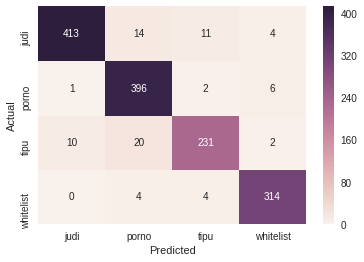

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [55]:
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['title', 'content']])
            print('')

'tipu' predicted as 'judi' : 10 examples.


,title,content
2617,agen bola terpercaya,Kami Hadir di Pontianak Untuk Menjamin Rasa Am...
2565,HotForex - World Leader in Financial Trading,Sekolah Forex Indonesian Forex Society Pelati...
2706,Master Forex Pontianak,Kami Hadir di Pontianak Untuk Menjamin Rasa Am...
2552,"Kumpulan Bandar Togel, Situs Poker Terbaru Dan...",Daftar GO! Daftar GO! Daftar GO! Daftar GO! D...
2554,Hantu Promo | Portal Promo Bonus Judi Online,QQFUNBETCOM Situs Free Games Mobile Slot Onlin...
2530,Leuke tieners worden anaal ontmaagd! - Kimholl...,This is the default welcome page used to test ...
2560,Review agen domino qiu qiu,Pasang Iklan Baris Gratis Premium Banner dan L...
2626,programkejutanbri.ga,Free Porn Porn Promos Exclusive Free Anal Ha...
2615,DISKON PEMASANGAN,DISKON TARUHAN DAN HADIAHDISKON DAN HADIAH TOG...
2625,Porn Freebies & Promos,Free Porn Porn Promos Exclusive Free Anal Ha...



'judi' predicted as 'porno' : 14 examples.


,title,content
156,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
57,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
773,"Forum Judi Bola, Betting, Casino Online indone...",forumjudibiz adalah forum komunitas diskusi pr...
639,PREDIKSI MACANTOGEL,MACANTOGELCOM AMAN DAN TERPERCAYA WWWQQDEWACOM...
1002,daftarjuditogel - Home,Here you can entera little moreinformation Her...
829,Info Judi Domino Online dan Judi Online Terper...,X XUncategorizedJUDI SLOTJUDI CASINOJUDI ONLIN...
985,Daftar Situs Judi Online,Daftar Situs Judi Online 2017\tCopyright All ...
683,Rumus Judi Online,Bandar JudiBola OnlineMain DindongHongkongPred...
621,PASARANTOGEL2 | SITUS TOGEL ONLINE | AGEN TOGE...,Copyright 2016 Pasarantogel2
17,Bandar Judi Togel Online Terpercaya Singapura4...,tidak puas dengan ...



'tipu' predicted as 'porno' : 20 examples.


,title,content
2705,PESTA ISI ULANG MOBO INDOSAT 2017,NaN
2783,DAFTAR PEMENANG RESMI UNDIAN BERHADIAH PT M-KI...,NaN
3335,"Andana Zürich: Erotische Massagen, Tantra Mass...",Dear users an exciting time has come to an end...
3164,KEJUTAN TRI CARE3 2015,SLAMAT DATANG DI PTTRI CARE3
3106,calpestamento.com - Registered at Namecheap.com,This domain is registered at NamecheapThis dom...
3322,info hadiah isi ulang mkios,NaN
2630,Porn-in-tveriya.blogspot.com: פורנו בטבריה - t...,Sorry the blog you were looking for does not e...
2855,DAPATKAN HADIAH ANDROID ANDA,NaN
2534,Rachel Aldana - The Official Site of Rachel Al...,Welcome to my official site RachelAldanacom In...
3210,PT.Bank Rakyat Indonesia,NaN



'whitelist' predicted as 'porno' : 4 examples.


,title,content
3853,iPad untuk pegulat sumo,Pegulat sumo berjari gendut sehingga kesulitan...
3400,Pastika Ingin Nyepi Bersih dari Pesta Miras da...,Hal ini disampaikan saat acara Podium Bali Beb...
4314,"Mapplethorpe: Look at the Pictures, tinjauan S...",Film dokumenter baru tentang Robert Mapplethor...
3891,Kemudahan akses porno di internet 'merusak' pe...,Seorang ahli terapi seks kejiwaan memperingatk...



'judi' predicted as 'tipu' : 11 examples.


,title,content
514,Info promo Situs Agen Judi Bola Poker Casino I...,Ratudomino99 agen bandar domino qq terpercaya ...
979,MEDIA INFORMASI REFERENSI GOOGLE SEO ONLINE TE...,QQ8889 SITUS AGEN POKER BANDAR JUDI ONLINE AMA...
1098,WordPress.com — Get a Free Blog Here,This site has been archived or suspended for a...
775,"AduQ, Domino QQ, Domino99, Poker88, BandarQ, C...",Senikartu Merupakan Website Judi AduQ Domino ...
221,TIMORTOTO.COM - PARTNER BERMAIN TOGEL ANDA,﻿ Selamat Datang di TIMOR TOTO Bandar Online T...
124,TIMORTOTO.COM - PARTNER BERMAIN TOGEL ANDA,﻿ Selamat Datang di TIMOR TOTO Bandar Online T...
97,SolutionTipster - Football Pools and Online Be...,>>> FOOTBALL RESULTS >>> BETTING SITES >>Tipst...
1078,Info Seputar Judi Online Terlengkap - Cara Pas...,Cara Daftar Casino SBOBET – Pada kesempatan ka...
744,Rishikesh Jungle Camps | Cottages in Rishikesh...,Welcome TO The Enjoy In Rishikesh Jungle Camps...
686,"senijudi.com-daftar judi online, link alternat...",Game Aduq online adalah game yang paling mudah...



'porno' predicted as 'tipu' : 2 examples.


,title,content
2226,Kumpulan Cerita Seks Terbaru By: AREATOTO | ww...,Pada suatu malam yang panas di kamar Andra Ia ...
1712,ray ban wayfarer | Ray-Ban® styles including O...,ray ban round metal sunglasses women ray ban a...



'whitelist' predicted as 'tipu' : 4 examples.


,title,content
3700,"Medium Diblokir Karena Judi Bola, Kominfo Dapa...",JAKARTA Awal pekan ini platform blog Mediu...
3414,"""Wanita Emas"" Ingin Lokasi Prostitusi dan Perj...",JAKARTA Bakal calon gubernur DKI Jakarta Mi...
3574,Kominfo Blokir Hasil Pencarian Gambar Porno di...,Kementerian Komunikasi dan Informatika ( Komin...
4085,Gubernur Pastika: Sertifikat Tanah Jangan Dipa...,DENPASAR Presiden RI Joko Widodo menyerahka...



'judi' predicted as 'whitelist' : 4 examples.


,title,content
866,Judi Online Sbobet – Website situs agen bandar...,Website situs agen bandar judi bola togel poke...
1259,Prediksi Bola M88 Sochi Sport Events - Akurat ...,Prediksi Bola M88 Sochi Sport Events Prediksi ...
938,"Agen Sbobet, Judi Bola, Judi Online dan Bandar...",Situs Judi Bola Resmi – Saat-saat kejeniusan D...
1068,Taruhan bola - Judi Online - Casino Online,Satu keputusan sulit dan menantang baru saja d...



'porno' predicted as 'whitelist' : 6 examples.


,title,content
2476,Koleksi Cerita Sex dan Cerita Dewasa,Hallo aku andy aku adalah seorang mahasiswa di...
2475,gaydanceritanya,Hallo aku andy aku adalah seorang mahasiswa di...
1732,Ikomik - komik untuk semua,Assalamualaikum Karya saya yang berikutnya aka...
2057,Gadis Bugil,#penganutkepercayaan #islamktp #penghayatkeper...
2075,Koleksi Gambar Artis Telanjang,Kumpulan Cerita Panas Seru Paling Lengkap Ceri...
2470,gaydanceritanya,Hallo aku andy aku adalah seorang mahasiswa di...



'tipu' predicted as 'whitelist' : 2 examples.


,title,content
2672,BANTUAN BPJS,BANTUAN BPJS ...
2839,MB Trading | Offered by Ally Invest,Selamat Datang di Website PT Nabila Beauty Sh...


In [56]:
model.fit(fitur, label)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [58]:
from sklearn.feature_selection import chi2

N = 5
for category, category_id in sorted(category_to_id.iteritems()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(cv.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'judi':
  . Top unigrams:
       . hongkong
       . pengikut
       . sgp
       . kamis
       . 2013
  . Top bigrams:
       . agen togel
       . aman terpercaya
       . copyright 2016
       . prediksi togel
       . copyright 2018
# 'porno':
  . Top unigrams:
       . 2006
       . hot
       . memekfoto
       . cerita
       . bugil
  . Top bigrams:
       . situs agen
       . by blogger
       . terpercayaagen togel
       . terpercaya agen
       . bola onlineagen
# 'tipu':
  . Top unigrams:
       . pulsa
       . hotfoto
       . ________________________
       . didukung
       . kabig
  . Top bigrams:
       . november 2017
       . sertifikat kominfo
       . sponsor utama
       . nama wahyuni
       . pos comentar
# 'whitelist':
  . Top unigrams:
       . turki
       . mengaku
       . polisi
       . bbc
       . perjudian
  . Top bigrams:
       . wartawan bbc
       . video porno
       . sepak bola
       . barang bukti
       . kanit reskrim


In [59]:
df[konten_data.str.lower().str.contains('togel')].category.value_counts()

judi         818
whitelist     34
porno         21
tipu          11
Name: category, dtype: int64

In [61]:
texts = ["Agen Togel Terbaik",
         "Ngentot bareng tante girang yang super seksi dan dewasa.",
         "Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, sejumlah buku beserta kertas rekap togel. Tak hanya sampai di situ. Dari hasil pengembangan dan penyelidikan, berdasarkan pengakuan tersangka, uang tersebut selanjutnya akan disetor kepada SB. Dari pengakuan tersangka, hasil penjualan togel tersebut akan disetor kepada bandar lainnya, yaitu SB. Polisi kemudian melacak keberadaan pelaku dan membekuknya, jelas Andi Yul. Tersangka SB diringkus di kediamannya di Kelurahan Sungai Jawi Luar sekitar pukul 17.00 WIB. Barang bukti yang diamankan di antaranya dua unit mesin faks, empat gulung kertas faks, satu unit telepon rumah, tiga buah buku dan lembaran kertas yang sudah berisikan tulisan rekaman nomor togel. Saat ini, para tersangka masih berada di tahanan Mapolresta Pontianak guna dilakukan penyidikan dan proses hukum selanjutnya. ",
         "Penangkapan bandar judi oleh polisi di kota Medan memicu pertikaian di antara warga sekitar Medan Tembung. Hal itu disebabkan bandar judi ini dikenal luas sebagai Robin Hood kota Tembung oleh masyarakat",
         "Bahaya Dan Dampak Buruk Dari Bermain Judi - Sangat banyak orang yang menggemari judi apalagi di zaman tekhnologi modern sekarang ini banyak situs-situs yang menyediakan ladang perjudian di internet dan judi dikemas demikian rupa dengan berbagai macam seperti judi online Poker, permainan kartu lainnya dan taruhan bola yang menjamur diinternet,  dengan iming- iming mendapatkan uang secara instan sehingga banyak orang yang terjerumus kedalam perjudian yang tidak sedikit orang  yang menghabiskan penghasilannya untuk judi dan akhirnya menjatuhkan orang ke dalam jurang kemiskinan. Dalam ayat di atas judi dikategorikan perbuatan syetan. Karena syetanlah yang hanya mau melakukan perbuatan keji yang merugikan dan menghancurkan dirinya sendiri. Dalam ayat di atas juga dinyatakan dengan jelas perjudian akan dapat menyebabkan permusuhan, kebencian dan perkelahiaan, berikut dampak Negatif atau bahaya dari bermain judi dibawah ini :",
         "You won't guess what the latest trend in data analysis is!"]
text_features = cv.transform(texts)
predictions = model.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Agen Togel Terbaik"
  - Predicted as: 'judi' 

"Ngentot bareng tante girang yang super seksi dan dewasa."
  - Predicted as: 'porno' 

"Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, s

In [67]:
from sklearn.externals import joblib

joblib.dump(model, 'model_onevsrestLinearSvc.pkl')

['model_onevsrestLinearSvc.pkl']

In [0]:
pred = joblib.load('model_onevsrestLinearSvc.pkl')


In [69]:
teks = ["Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"]
text_features = cv.transform(teks)
predictions = pred.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(teks, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"
  - Predicted as: 'judi' 



In [0]:
from google.colab import files
files.download('model_onevsrestLinearSvc.pkl')

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('model_onevsrestLinearSvc.pkl')
file.Upload() 

**SGD Classifier**

In [0]:
from sklearn.model_selection import train_test_split

model = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 1e-3, random_state = 42, max_iter = 5, tol = None)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(fitur, label, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_test)
y_pred = model.predict(X_test)

Text(0.5,15,u'Predicted')

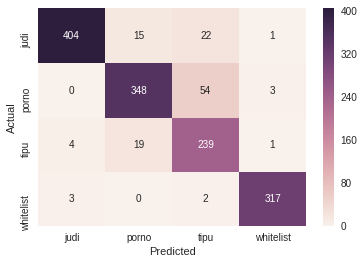

In [74]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [75]:
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['title', 'content']])
            print('')

'tipu' predicted as 'judi' : 4 examples.


,title,content
2620,IIS 8.5 详细错误 - 403.14 - Forbidden,Anda bisa mendapatkan dana tambahan 50000 USD ...
2554,Hantu Promo | Portal Promo Bonus Judi Online,QQFUNBETCOM Situs Free Games Mobile Slot Onlin...
2530,Leuke tieners worden anaal ontmaagd! - Kimholl...,This is the default welcome page used to test ...
2615,DISKON PEMASANGAN,DISKON TARUHAN DAN HADIAHDISKON DAN HADIAH TOG...



'whitelist' predicted as 'judi' : 3 examples.


,title,content
3565,"Viral, Wanita Suporter Rusia, Jago Prediksi, T...",MOSKWA Natalya Nemchinova kerap menjadi sor...
3859,Akun-akun pro ISIS dibanjiri pornografi dan pe...,Kelompok aktivis peretas Anonymous telah mener...
3480,"Falcao adalah ""Perjudian"" bagi MU",Falcao merupakan salah satu penyerang top yang...



'judi' predicted as 'porno' : 15 examples.


,title,content
979,MEDIA INFORMASI REFERENSI GOOGLE SEO ONLINE TE...,QQ8889 SITUS AGEN POKER BANDAR JUDI ONLINE AMA...
220,Oddset | Danske spil | Tips dk | Spilforslag |...,Søg på SpilXperten Det vrimler ikke ligefrem m...
156,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
57,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
559,"Prediksi Angka Togel, Singapura, Hongkong, Dan...",hongkong poolslisbon-poolssingapore-poolssabah...
829,Info Judi Domino Online dan Judi Online Terper...,X XUncategorizedJUDI SLOTJUDI CASINOJUDI ONLIN...
985,Daftar Situs Judi Online,Daftar Situs Judi Online 2017\tCopyright All ...
683,Rumus Judi Online,Bandar JudiBola OnlineMain DindongHongkongPred...
621,PASARANTOGEL2 | SITUS TOGEL ONLINE | AGEN TOGE...,Copyright 2016 Pasarantogel2
17,Bandar Judi Togel Online Terpercaya Singapura4...,tidak puas dengan ...



'tipu' predicted as 'porno' : 19 examples.


,title,content
2705,PESTA ISI ULANG MOBO INDOSAT 2017,NaN
2783,DAFTAR PEMENANG RESMI UNDIAN BERHADIAH PT M-KI...,NaN
3164,KEJUTAN TRI CARE3 2015,SLAMAT DATANG DI PTTRI CARE3
3334,Adana Escort 01,Aktuelle Tagespläne Geniessen Sie den Zauber ...
3322,info hadiah isi ulang mkios,NaN
2552,"Kumpulan Bandar Togel, Situs Poker Terbaru Dan...",Daftar GO! Daftar GO! Daftar GO! Daftar GO! D...
2855,DAPATKAN HADIAH ANDROID ANDA,NaN
3210,PT.Bank Rakyat Indonesia,NaN
3328,bear sex,bdsmdude: forcedbyguards: throat training Hot ...
3341,Bokep Tante dan ABG,Fans of Dana Vespoli will be happy today we ha...



'judi' predicted as 'tipu' : 22 examples.


,title,content
214,sukatogelonline.com | 520: Web server is retur...,There is an unknown connection issue between C...
1098,WordPress.com — Get a Free Blog Here,This site has been archived or suspended for a...
639,PREDIKSI MACANTOGEL,MACANTOGELCOM AMAN DAN TERPERCAYA WWWQQDEWACOM...
809,Situs Poker Terpercaya 2018 | Agen Judi Poker ...,MEMBER BARU BONUS BESAR 10%+ 100% PILIH Suka-S...
1002,daftarjuditogel - Home,Here you can entera little moreinformation Her...
117,sukatogelonline.com | 520: Web server is retur...,There is an unknown connection issue between C...
221,TIMORTOTO.COM - PARTNER BERMAIN TOGEL ANDA,﻿ Selamat Datang di TIMOR TOTO Bandar Online T...
1120,judiagenonline.com | 522: Connection timed out,The initial connection between Cloudflares net...
242,Blog Portal Yang Berbagi Info Seputar Prediksi...,Hk SabtuPrediksi TogelTogel HkHk JumatHk Kamis...
124,TIMORTOTO.COM - PARTNER BERMAIN TOGEL ANDA,﻿ Selamat Datang di TIMOR TOTO Bandar Online T...



'porno' predicted as 'tipu' : 54 examples.


,title,content
2143,Koleksi foto bugil foto memek telanjang video ...,This site requires JavaScript This message wil...
1914,Sito Spostato su ONLYFANS MODELLE,This is the post excerpt This is your very fir...
1580,Bokep Online Indonesia,Crafted with by Cinemabokep69 Distributed by...
1366,pep.zone Goodbye,Dear users an exciting time has come to an end...
1621,Visual mobile site building tool,Sorry the blog you were looking for does not e...
1646,grabav.com - Registered at Namecheap.com,This domain is registered at NamecheapThis dom...
1357,Contact Hostwinds Support,Please Contact The Hostwinds Support Departmen...
2250,ebokep.ml,Sorry the blog you were looking for does not e...
2117,Website Not Available,Sorry the blog you were looking for does not e...
1349,Website Not Available,Sorry the blog you were looking for does not e...



'whitelist' predicted as 'tipu' : 2 examples.


,title,content
3400,Pastika Ingin Nyepi Bersih dari Pesta Miras da...,Hal ini disampaikan saat acara Podium Bali Beb...
3662,Japan ban possession of child pornography,Belajar bahasa Inggris melalui berita BBC tent...



'porno' predicted as 'whitelist' : 3 examples.


,title,content
1732,Ikomik - komik untuk semua,Assalamualaikum Karya saya yang berikutnya aka...
1757,Berita Seputar Harian Olahraga Terkini - VIVA ...,VIVA Sport - Berita Terkini Seputar Bola Jadwa...
2057,Gadis Bugil,#penganutkepercayaan #islamktp #penghayatkeper...


In [76]:
model.fit(fitur, label)


SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [77]:
N = 3
for category, category_id in sorted(category_to_id.iteritems()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(cv.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'judi':
  . Top unigrams:
       . bermain
       . togel
       . main
  . Top bigrams:
       . situs judi
       . bermain poker
       . poker online
# 'porno':
  . Top unigrams:
       . bu
       . ipul
       . gak
  . Top bigrams:
       . bu nurul
       . mas arif
       . situs agen
# 'tipu':
  . Top unigrams:
       . instaforex
       . trading
       . eko
  . Top bigrams:
       . tante ayu
       . pemain judi
       . the company
# 'whitelist':
  . Top unigrams:
       . polisi
       . toko
       . juta
  . Top bigrams:
       . anak anak
       . sepak bola
       . barang bukti


In [78]:
df[konten_data.str.lower().str.contains('togel')].category.value_counts()

judi         818
whitelist     34
porno         21
tipu          11
Name: category, dtype: int64

In [80]:
texts = ["Agen Togel Terbaik",
         "Ngentot bareng tante girang yang super seksi dan dewasa.",
         "Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, sejumlah buku beserta kertas rekap togel. Tak hanya sampai di situ. Dari hasil pengembangan dan penyelidikan, berdasarkan pengakuan tersangka, uang tersebut selanjutnya akan disetor kepada SB. Dari pengakuan tersangka, hasil penjualan togel tersebut akan disetor kepada bandar lainnya, yaitu SB. Polisi kemudian melacak keberadaan pelaku dan membekuknya, jelas Andi Yul. Tersangka SB diringkus di kediamannya di Kelurahan Sungai Jawi Luar sekitar pukul 17.00 WIB. Barang bukti yang diamankan di antaranya dua unit mesin faks, empat gulung kertas faks, satu unit telepon rumah, tiga buah buku dan lembaran kertas yang sudah berisikan tulisan rekaman nomor togel. Saat ini, para tersangka masih berada di tahanan Mapolresta Pontianak guna dilakukan penyidikan dan proses hukum selanjutnya. ",
         "Penangkapan bandar judi oleh polisi di kota Medan memicu pertikaian di antara warga sekitar Medan Tembung.",
         "Bahaya Dan Dampak Buruk Dari Bermain Judi - Sangat banyak orang yang menggemari judi apalagi di zaman tekhnologi modern sekarang ini banyak situs-situs yang menyediakan ladang perjudian di internet dan judi dikemas demikian rupa dengan berbagai macam seperti judi online Poker, permainan kartu lainnya dan taruhan bola yang menjamur diinternet,  dengan iming- iming mendapatkan uang secara instan sehingga banyak orang yang terjerumus kedalam perjudian yang tidak sedikit orang  yang menghabiskan penghasilannya untuk judi dan akhirnya menjatuhkan orang ke dalam jurang kemiskinan. Dalam ayat di atas judi dikategorikan perbuatan syetan. Karena syetanlah yang hanya mau melakukan perbuatan keji yang merugikan dan menghancurkan dirinya sendiri. Dalam ayat di atas juga dinyatakan dengan jelas perjudian akan dapat menyebabkan permusuhan, kebencian dan perkelahiaan, berikut dampak Negatif atau bahaya dari bermain judi dibawah ini :",
         "Bu Ipul dan Mas Arif"]
text_features = cv.transform(texts)
predictions = model.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Agen Togel Terbaik"
  - Predicted as: 'tipu' 

"Ngentot bareng tante girang yang super seksi dan dewasa."
  - Predicted as: 'porno' 

"Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, s

In [81]:
joblib.dump(model, 'model_sgdclassifier.pkl')

['model_sgdclassifier.pkl']

In [0]:
pred = joblib.load('model_sgdclassifier.pkl')

In [83]:
teks = ["Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"]
text_features = cv.transform(teks)
predictions = pred.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(teks, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"
  - Predicted as: 'judi' 



In [0]:
files.download('model_sgdclassifier.pkl')

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('model_sgdclassifier.pkl')
file.Upload() 

**SVC kernel Linear**

In [0]:
model = SVC(kernel = 'linear', C=1)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(fitur, label, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_test)
y_pred = model.predict(X_test)

Text(0.5,15,u'Predicted')

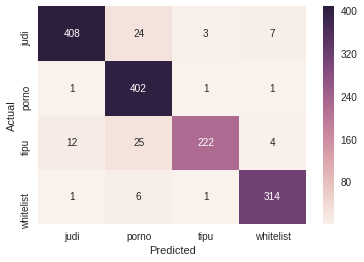

In [87]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [88]:
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['title', 'content']])
            print('')

'tipu' predicted as 'judi' : 12 examples.


,title,content
2617,agen bola terpercaya,Kami Hadir di Pontianak Untuk Menjamin Rasa Am...
2565,HotForex - World Leader in Financial Trading,Sekolah Forex Indonesian Forex Society Pelati...
2706,Master Forex Pontianak,Kami Hadir di Pontianak Untuk Menjamin Rasa Am...
2534,Rachel Aldana - The Official Site of Rachel Al...,Welcome to my official site RachelAldanacom In...
2554,Hantu Promo | Portal Promo Bonus Judi Online,QQFUNBETCOM Situs Free Games Mobile Slot Onlin...
2972,FOREX MMCIS group,Bit offers binary overseas surabayaofrexcom fo...
2530,Leuke tieners worden anaal ontmaagd! - Kimholl...,This is the default welcome page used to test ...
2560,Review agen domino qiu qiu,Pasang Iklan Baris Gratis Premium Banner dan L...
2626,programkejutanbri.ga,Free Porn Porn Promos Exclusive Free Anal Ha...
2604,Trade Forex | CFDs Trading | Options | Easy Fo...,Read more Read more Read more Earned by our cl...



'judi' predicted as 'porno' : 24 examples.


,title,content
304,Panduan Togel Online,Panduan Togel Online untuk berbagi informasi ...
775,"AduQ, Domino QQ, Domino99, Poker88, BandarQ, C...",Senikartu Merupakan Website Judi AduQ Domino ...
156,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
57,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
773,"Forum Judi Bola, Betting, Casino Online indone...",forumjudibiz adalah forum komunitas diskusi pr...
639,PREDIKSI MACANTOGEL,MACANTOGELCOM AMAN DAN TERPERCAYA WWWQQDEWACOM...
1070,Panduan Togel Online,Panduan Togel Online untuk berbagi informasi ...
378,Tips Judi Online | BandarQ | Domino99 | Bandar...,Panduan Cara Bermain PokerTips Judi OnlinePan...
1002,daftarjuditogel - Home,Here you can entera little moreinformation Her...
829,Info Judi Domino Online dan Judi Online Terper...,X XUncategorizedJUDI SLOTJUDI CASINOJUDI ONLIN...



'tipu' predicted as 'porno' : 25 examples.


,title,content
2705,PESTA ISI ULANG MOBO INDOSAT 2017,NaN
2783,DAFTAR PEMENANG RESMI UNDIAN BERHADIAH PT M-KI...,NaN
3335,"Andana Zürich: Erotische Massagen, Tantra Mass...",Dear users an exciting time has come to an end...
3164,KEJUTAN TRI CARE3 2015,SLAMAT DATANG DI PTTRI CARE3
3106,calpestamento.com - Registered at Namecheap.com,This domain is registered at NamecheapThis dom...
3334,Adana Escort 01,Aktuelle Tagespläne Geniessen Sie den Zauber ...
3322,info hadiah isi ulang mkios,NaN
2590,PEMENANG UNDIAN HADIAH KUPON CHITATO TAHUN 201...,PT INDOFOOD FRITOLAY MAKMUR TBK
2764,PEMENANG RESMI RIM BLACKBERRY 2017,HADIAH RIM BLACKBERRYINFO PROMO RIM BLACKBERRY...
2552,"Kumpulan Bandar Togel, Situs Poker Terbaru Dan...",Daftar GO! Daftar GO! Daftar GO! Daftar GO! D...



'whitelist' predicted as 'porno' : 6 examples.


,title,content
3620,Polisi Selidiki Video Porno Mirip Kontestan Aj...,JAKARTA Polisi menyelidiki beredarnya video...
3853,iPad untuk pegulat sumo,Pegulat sumo berjari gendut sehingga kesulitan...
3408,"Bangun Gedung Gitar, Florida Saingi Pusat Judi...",Bagi orang yang sering mengunjungi Kasino Har...
3722,Penakluk Chong Wei Pernah Dihukum Karena Judi,KUALA LUMPUR Kompas Tunggal utama Malaysia L...
3844,Villas-Boas: Saya bukan diktator,Manajer baru Chelsea Andre Villas-Boas mengkla...
3891,Kemudahan akses porno di internet 'merusak' pe...,Seorang ahli terapi seks kejiwaan memperingatk...



'judi' predicted as 'tipu' : 3 examples.


,title,content
514,Info promo Situs Agen Judi Bola Poker Casino I...,Ratudomino99 agen bandar domino qq terpercaya ...
1098,WordPress.com — Get a Free Blog Here,This site has been archived or suspended for a...
999,Daftar Judi Kartu Online | Judi Kartu Uang Asli,Daftar Judi Kartu Online untuk main Judi Kartu...



'judi' predicted as 'whitelist' : 7 examples.


,title,content
965,Bagaimana Liverpool dan Man City membantu mend...,Bandar Bola Terbesar – LYON Prancis – Tim nasi...
866,Judi Online Sbobet – Website situs agen bandar...,Website situs agen bandar judi bola togel poke...
1259,Prediksi Bola M88 Sochi Sport Events - Akurat ...,Prediksi Bola M88 Sochi Sport Events Prediksi ...
348,SITUS PREDIKSI JUDI ONLINE TERPERCAYA™ ~ PREDI...,Prediksi Skor Celtic Vs Alashkert – Bursa Taru...
938,"Agen Sbobet, Judi Bola, Judi Online dan Bandar...",Situs Judi Bola Resmi – Saat-saat kejeniusan D...
713,Situs Judi Bola Sbobet Online Resmi terpercaya...,lucky9casino – dewaasia – Inggris tidak berhas...
701,"Situs Judi Bola Dewabet | Pelajari, Mainkan, d...",Sebagian besar masyarakat menyukai berbagai je...



'tipu' predicted as 'whitelist' : 4 examples.


,title,content
2672,BANTUAN BPJS,BANTUAN BPJS ...
3253,M-KIOS - Home,M-KIOS - Home M-K...
2970,PT.COCACOLA INDONESIA,PTCOCACOLA INDONESIA ...
2839,MB Trading | Offered by Ally Invest,Selamat Datang di Website PT Nabila Beauty Sh...


In [113]:
model.fit(fitur, label)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
N = 3
for category, category_id in sorted(category_to_id.iteritems()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(cv.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'judi':
  . Top unigrams:
       . hongkong
       . sgp
       . pengikut
  . Top bigrams:
       . agen togel
       . aman terpercaya
       . copyright 2018
# 'porno':
  . Top unigrams:
       . hongkong
       . sgp
       . pengikut
  . Top bigrams:
       . aman terpercaya
       . agen togel
       . copyright 2016
# 'tipu':
  . Top unigrams:
       . online
       . 2018
       . prediksi
  . Top bigrams:
       . situs judi
       . piala dunia
       . judi online
# 'whitelist':
  . Top unigrams:
       . hot
       . memekfoto
       . bugil
  . Top bigrams:
       . hotfoto hot
       . dewasacerita dewasa
       . video bokep


In [115]:
df[konten_data.str.lower().str.contains('togel')].category.value_counts()

judi         818
whitelist     34
porno         21
tipu          11
Name: category, dtype: int64

In [116]:
texts = ["Agen Togel Terbaik",
         "Ngentot bareng tante girang yang super seksi dan dewasa.",
         "Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, sejumlah buku beserta kertas rekap togel. Tak hanya sampai di situ. Dari hasil pengembangan dan penyelidikan, berdasarkan pengakuan tersangka, uang tersebut selanjutnya akan disetor kepada SB. Dari pengakuan tersangka, hasil penjualan togel tersebut akan disetor kepada bandar lainnya, yaitu SB. Polisi kemudian melacak keberadaan pelaku dan membekuknya, jelas Andi Yul. Tersangka SB diringkus di kediamannya di Kelurahan Sungai Jawi Luar sekitar pukul 17.00 WIB. Barang bukti yang diamankan di antaranya dua unit mesin faks, empat gulung kertas faks, satu unit telepon rumah, tiga buah buku dan lembaran kertas yang sudah berisikan tulisan rekaman nomor togel. Saat ini, para tersangka masih berada di tahanan Mapolresta Pontianak guna dilakukan penyidikan dan proses hukum selanjutnya. ",
         "Penangkapan bandar judi oleh polisi di kota Medan memicu pertikaian di antara warga sekitar Medan Tembung.",
         "Bahaya Dan Dampak Buruk Dari Bermain Judi - Sangat banyak orang yang menggemari judi apalagi di zaman tekhnologi modern sekarang ini banyak situs-situs yang menyediakan ladang perjudian di internet dan judi dikemas demikian rupa dengan berbagai macam seperti judi online Poker, permainan kartu lainnya dan taruhan bola yang menjamur diinternet,  dengan iming- iming mendapatkan uang secara instan sehingga banyak orang yang terjerumus kedalam perjudian yang tidak sedikit orang  yang menghabiskan penghasilannya untuk judi dan akhirnya menjatuhkan orang ke dalam jurang kemiskinan. Dalam ayat di atas judi dikategorikan perbuatan syetan. Karena syetanlah yang hanya mau melakukan perbuatan keji yang merugikan dan menghancurkan dirinya sendiri. Dalam ayat di atas juga dinyatakan dengan jelas perjudian akan dapat menyebabkan permusuhan, kebencian dan perkelahiaan, berikut dampak Negatif atau bahaya dari bermain judi dibawah ini :",
         "You won't guess what the latest trend in data analysis is!"]
text_features = cv.transform(texts).toarray()
predictions = model.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")
#print(text_features)

"Agen Togel Terbaik"
  - Predicted as: 'judi' 

"Ngentot bareng tante girang yang super seksi dan dewasa."
  - Predicted as: 'porno' 

"Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, s

In [117]:
joblib.dump(model, 'model_svckernelinear.pkl')

['model_svckernelinear.pkl']

In [0]:
pred = joblib.load('model_svckernelinear.pkl')

In [120]:
teks = ["Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"]
text_features = cv.transform(teks).toarray()
predictions = pred.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(teks, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"
  - Predicted as: 'judi' 



In [151]:
files.download('model_svckernelinear.pkl')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 49228, 0, 0)
----------------------------------------


Traceback (most recent call last):
  File "/usr/lib/python2.7/SocketServer.py", line 290, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python2.7/SocketServer.py", line 318, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python2.7/SocketServer.py", line 331, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python2.7/SocketServer.py", line 654, in __init__
    self.finish()
  File "/usr/lib/python2.7/SocketServer.py", line 713, in finish
    self.wfile.close()
  File "/usr/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/usr/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('model_svckernelinear.pkl')
file.Upload() 

**Logistic Regression**

In [0]:
model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(fitur, label, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_test)
y_pred = model.predict(X_test)

Text(0.5,15,u'Predicted')

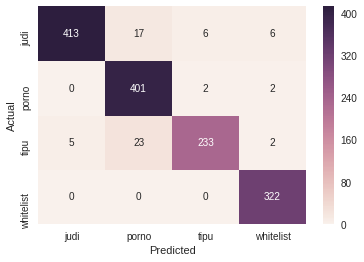

In [124]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [125]:
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['title', 'content']])
            print('')

'tipu' predicted as 'judi' : 5 examples.


,title,content
2554,Hantu Promo | Portal Promo Bonus Judi Online,QQFUNBETCOM Situs Free Games Mobile Slot Onlin...
2530,Leuke tieners worden anaal ontmaagd! - Kimholl...,This is the default welcome page used to test ...
2626,programkejutanbri.ga,Free Porn Porn Promos Exclusive Free Anal Ha...
2615,DISKON PEMASANGAN,DISKON TARUHAN DAN HADIAHDISKON DAN HADIAH TOG...
2625,Porn Freebies & Promos,Free Porn Porn Promos Exclusive Free Anal Ha...



'judi' predicted as 'porno' : 17 examples.


,title,content
220,Oddset | Danske spil | Tips dk | Spilforslag |...,Søg på SpilXperten Det vrimler ikke ligefrem m...
156,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
57,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
639,PREDIKSI MACANTOGEL,MACANTOGELCOM AMAN DAN TERPERCAYA WWWQQDEWACOM...
559,"Prediksi Angka Togel, Singapura, Hongkong, Dan...",hongkong poolslisbon-poolssingapore-poolssabah...
1002,daftarjuditogel - Home,Here you can entera little moreinformation Her...
829,Info Judi Domino Online dan Judi Online Terper...,X XUncategorizedJUDI SLOTJUDI CASINOJUDI ONLIN...
985,Daftar Situs Judi Online,Daftar Situs Judi Online 2017\tCopyright All ...
683,Rumus Judi Online,Bandar JudiBola OnlineMain DindongHongkongPred...
621,PASARANTOGEL2 | SITUS TOGEL ONLINE | AGEN TOGE...,Copyright 2016 Pasarantogel2



'tipu' predicted as 'porno' : 23 examples.


,title,content
2705,PESTA ISI ULANG MOBO INDOSAT 2017,NaN
2783,DAFTAR PEMENANG RESMI UNDIAN BERHADIAH PT M-KI...,NaN
3335,"Andana Zürich: Erotische Massagen, Tantra Mass...",Dear users an exciting time has come to an end...
3164,KEJUTAN TRI CARE3 2015,SLAMAT DATANG DI PTTRI CARE3
3106,calpestamento.com - Registered at Namecheap.com,This domain is registered at NamecheapThis dom...
3322,info hadiah isi ulang mkios,NaN
2617,agen bola terpercaya,Kami Hadir di Pontianak Untuk Menjamin Rasa Am...
2565,HotForex - World Leader in Financial Trading,Sekolah Forex Indonesian Forex Society Pelati...
2706,Master Forex Pontianak,Kami Hadir di Pontianak Untuk Menjamin Rasa Am...
2630,Porn-in-tveriya.blogspot.com: פורנו בטבריה - t...,Sorry the blog you were looking for does not e...



'judi' predicted as 'tipu' : 6 examples.


,title,content
514,Info promo Situs Agen Judi Bola Poker Casino I...,Ratudomino99 agen bandar domino qq terpercaya ...
1098,WordPress.com — Get a Free Blog Here,This site has been archived or suspended for a...
775,"AduQ, Domino QQ, Domino99, Poker88, BandarQ, C...",Senikartu Merupakan Website Judi AduQ Domino ...
221,TIMORTOTO.COM - PARTNER BERMAIN TOGEL ANDA,﻿ Selamat Datang di TIMOR TOTO Bandar Online T...
124,TIMORTOTO.COM - PARTNER BERMAIN TOGEL ANDA,﻿ Selamat Datang di TIMOR TOTO Bandar Online T...
97,SolutionTipster - Football Pools and Online Be...,>>> FOOTBALL RESULTS >>> BETTING SITES >>Tipst...



'porno' predicted as 'tipu' : 2 examples.


,title,content
2475,gaydanceritanya,Hallo aku andy aku adalah seorang mahasiswa di...
2470,gaydanceritanya,Hallo aku andy aku adalah seorang mahasiswa di...



'judi' predicted as 'whitelist' : 6 examples.


,title,content
965,Bagaimana Liverpool dan Man City membantu mend...,Bandar Bola Terbesar – LYON Prancis – Tim nasi...
866,Judi Online Sbobet – Website situs agen bandar...,Website situs agen bandar judi bola togel poke...
1259,Prediksi Bola M88 Sochi Sport Events - Akurat ...,Prediksi Bola M88 Sochi Sport Events Prediksi ...
938,"Agen Sbobet, Judi Bola, Judi Online dan Bandar...",Situs Judi Bola Resmi – Saat-saat kejeniusan D...
1068,Taruhan bola - Judi Online - Casino Online,Satu keputusan sulit dan menantang baru saja d...
701,"Situs Judi Bola Dewabet | Pelajari, Mainkan, d...",Sebagian besar masyarakat menyukai berbagai je...



'porno' predicted as 'whitelist' : 2 examples.


,title,content
1732,Ikomik - komik untuk semua,Assalamualaikum Karya saya yang berikutnya aka...
2057,Gadis Bugil,#penganutkepercayaan #islamktp #penghayatkeper...



'tipu' predicted as 'whitelist' : 2 examples.


,title,content
2672,BANTUAN BPJS,BANTUAN BPJS ...
2839,MB Trading | Offered by Ally Invest,Selamat Datang di Website PT Nabila Beauty Sh...


In [126]:
model.fit(fitur, label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
N = 3
for category, category_id in sorted(category_to_id.iteritems()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(cv.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'judi':
  . Top unigrams:
       . hongkong
       . sgp
       . prediksi
  . Top bigrams:
       . prediksi togel
       . agen togel
       . situs judi
# 'porno':
  . Top unigrams:
       . cerita
       . bokep
       . bugil
  . Top bigrams:
       . situs agen
       . terpercayaagen togel
       . bola onlineagen
# 'tipu':
  . Top unigrams:
       . ________________________
       . pemenang
       . didukung
  . Top bigrams:
       . pos comentar
       . sponsor utama
       . nama wahyuni
# 'whitelist':
  . Top unigrams:
       . polisi
       . pornografi
       . perjudian
  . Top bigrams:
       . wartawan bbc
       . sepak bola
       . video porno


In [128]:
df[konten_data.str.lower().str.contains('togel')].category.value_counts()

judi         818
whitelist     34
porno         21
tipu          11
Name: category, dtype: int64

In [129]:
texts = ["Agen Togel Terbaik",
         "Ngentot bareng tante girang yang super seksi dan dewasa.",
         "Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, sejumlah buku beserta kertas rekap togel. Tak hanya sampai di situ. Dari hasil pengembangan dan penyelidikan, berdasarkan pengakuan tersangka, uang tersebut selanjutnya akan disetor kepada SB. Dari pengakuan tersangka, hasil penjualan togel tersebut akan disetor kepada bandar lainnya, yaitu SB. Polisi kemudian melacak keberadaan pelaku dan membekuknya, jelas Andi Yul. Tersangka SB diringkus di kediamannya di Kelurahan Sungai Jawi Luar sekitar pukul 17.00 WIB. Barang bukti yang diamankan di antaranya dua unit mesin faks, empat gulung kertas faks, satu unit telepon rumah, tiga buah buku dan lembaran kertas yang sudah berisikan tulisan rekaman nomor togel. Saat ini, para tersangka masih berada di tahanan Mapolresta Pontianak guna dilakukan penyidikan dan proses hukum selanjutnya. ",
         "Penangkapan bandar judi oleh polisi di kota Medan memicu pertikaian di antara warga sekitar Medan Tembung.",
         "Bahaya Dan Dampak Buruk Dari Bermain Judi - Sangat banyak orang yang menggemari judi apalagi di zaman tekhnologi modern sekarang ini banyak situs-situs yang menyediakan ladang perjudian di internet dan judi dikemas demikian rupa dengan berbagai macam seperti judi online Poker, permainan kartu lainnya dan taruhan bola yang menjamur diinternet,  dengan iming- iming mendapatkan uang secara instan sehingga banyak orang yang terjerumus kedalam perjudian yang tidak sedikit orang  yang menghabiskan penghasilannya untuk judi dan akhirnya menjatuhkan orang ke dalam jurang kemiskinan. Dalam ayat di atas judi dikategorikan perbuatan syetan. Karena syetanlah yang hanya mau melakukan perbuatan keji yang merugikan dan menghancurkan dirinya sendiri. Dalam ayat di atas juga dinyatakan dengan jelas perjudian akan dapat menyebabkan permusuhan, kebencian dan perkelahiaan, berikut dampak Negatif atau bahaya dari bermain judi dibawah ini :",
         "Bu Ipul dan Mas Arif"]
text_features = cv.transform(texts)
predictions = model.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Agen Togel Terbaik"
  - Predicted as: 'judi' 

"Ngentot bareng tante girang yang super seksi dan dewasa."
  - Predicted as: 'porno' 

"Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, s

In [130]:
joblib.dump(model, 'model_logisticregression.pkl')

['model_logisticregression.pkl']

In [0]:
pred = joblib.load('model_logisticregression.pkl')

In [132]:
teks = ["Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"]
text_features = cv.transform(teks)
predictions = pred.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(teks, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"
  - Predicted as: 'judi' 



In [0]:
files.download('model_logisticregression.pkl')

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('model_logisticregression.pkl')
file.Upload() 

**Linear SVC**

In [0]:
model = LinearSVC(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(fitur, label, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_test)
y_pred = model.predict(X_test)

Text(0.5,15,u'Predicted')

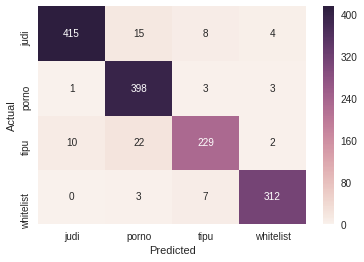

In [136]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [137]:
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['title', 'content']])
            print('')

'tipu' predicted as 'judi' : 10 examples.


,title,content
2617,agen bola terpercaya,Kami Hadir di Pontianak Untuk Menjamin Rasa Am...
2565,HotForex - World Leader in Financial Trading,Sekolah Forex Indonesian Forex Society Pelati...
2706,Master Forex Pontianak,Kami Hadir di Pontianak Untuk Menjamin Rasa Am...
2552,"Kumpulan Bandar Togel, Situs Poker Terbaru Dan...",Daftar GO! Daftar GO! Daftar GO! Daftar GO! D...
2554,Hantu Promo | Portal Promo Bonus Judi Online,QQFUNBETCOM Situs Free Games Mobile Slot Onlin...
2530,Leuke tieners worden anaal ontmaagd! - Kimholl...,This is the default welcome page used to test ...
2560,Review agen domino qiu qiu,Pasang Iklan Baris Gratis Premium Banner dan L...
2626,programkejutanbri.ga,Free Porn Porn Promos Exclusive Free Anal Ha...
2615,DISKON PEMASANGAN,DISKON TARUHAN DAN HADIAHDISKON DAN HADIAH TOG...
2625,Porn Freebies & Promos,Free Porn Porn Promos Exclusive Free Anal Ha...



'judi' predicted as 'porno' : 15 examples.


,title,content
156,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
57,"Prediksi togel hongkong,rumus togel,keluaran t...",Created By Sora Templates Blogger Templates ...
773,"Forum Judi Bola, Betting, Casino Online indone...",forumjudibiz adalah forum komunitas diskusi pr...
639,PREDIKSI MACANTOGEL,MACANTOGELCOM AMAN DAN TERPERCAYA WWWQQDEWACOM...
829,Info Judi Domino Online dan Judi Online Terper...,X XUncategorizedJUDI SLOTJUDI CASINOJUDI ONLIN...
985,Daftar Situs Judi Online,Daftar Situs Judi Online 2017\tCopyright All ...
683,Rumus Judi Online,Bandar JudiBola OnlineMain DindongHongkongPred...
621,PASARANTOGEL2 | SITUS TOGEL ONLINE | AGEN TOGE...,Copyright 2016 Pasarantogel2
17,Bandar Judi Togel Online Terpercaya Singapura4...,tidak puas dengan ...
285,Agen SBOBET | Daftar Judi Bola | Live Casino I...,Our Games Register Deposit Withdraw Bonus ...



'tipu' predicted as 'porno' : 22 examples.


,title,content
2705,PESTA ISI ULANG MOBO INDOSAT 2017,NaN
2783,DAFTAR PEMENANG RESMI UNDIAN BERHADIAH PT M-KI...,NaN
3335,"Andana Zürich: Erotische Massagen, Tantra Mass...",Dear users an exciting time has come to an end...
3164,KEJUTAN TRI CARE3 2015,SLAMAT DATANG DI PTTRI CARE3
3106,calpestamento.com - Registered at Namecheap.com,This domain is registered at NamecheapThis dom...
3322,info hadiah isi ulang mkios,NaN
2590,PEMENANG UNDIAN HADIAH KUPON CHITATO TAHUN 201...,PT INDOFOOD FRITOLAY MAKMUR TBK
2764,PEMENANG RESMI RIM BLACKBERRY 2017,HADIAH RIM BLACKBERRYINFO PROMO RIM BLACKBERRY...
2630,Porn-in-tveriya.blogspot.com: פורנו בטבריה - t...,Sorry the blog you were looking for does not e...
2855,DAPATKAN HADIAH ANDROID ANDA,NaN



'whitelist' predicted as 'porno' : 3 examples.


,title,content
3400,Pastika Ingin Nyepi Bersih dari Pesta Miras da...,Hal ini disampaikan saat acara Podium Bali Beb...
4314,"Mapplethorpe: Look at the Pictures, tinjauan S...",Film dokumenter baru tentang Robert Mapplethor...
4311,Mengapa Android dan iPhone tolak aplikasi ungg...,Google Play dan Apple menolak aplikasi yang di...



'judi' predicted as 'tipu' : 8 examples.


,title,content
514,Info promo Situs Agen Judi Bola Poker Casino I...,Ratudomino99 agen bandar domino qq terpercaya ...
1098,WordPress.com — Get a Free Blog Here,This site has been archived or suspended for a...
775,"AduQ, Domino QQ, Domino99, Poker88, BandarQ, C...",Senikartu Merupakan Website Judi AduQ Domino ...
221,TIMORTOTO.COM - PARTNER BERMAIN TOGEL ANDA,﻿ Selamat Datang di TIMOR TOTO Bandar Online T...
124,TIMORTOTO.COM - PARTNER BERMAIN TOGEL ANDA,﻿ Selamat Datang di TIMOR TOTO Bandar Online T...
744,Rishikesh Jungle Camps | Cottages in Rishikesh...,Welcome TO The Enjoy In Rishikesh Jungle Camps...
686,"senijudi.com-daftar judi online, link alternat...",Game Aduq online adalah game yang paling mudah...
999,Daftar Judi Kartu Online | Judi Kartu Uang Asli,Daftar Judi Kartu Online untuk main Judi Kartu...



'porno' predicted as 'tipu' : 3 examples.


,title,content
2475,gaydanceritanya,Hallo aku andy aku adalah seorang mahasiswa di...
1712,ray ban wayfarer | Ray-Ban® styles including O...,ray ban round metal sunglasses women ray ban a...
2470,gaydanceritanya,Hallo aku andy aku adalah seorang mahasiswa di...



'whitelist' predicted as 'tipu' : 7 examples.


,title,content
3700,"Medium Diblokir Karena Judi Bola, Kominfo Dapa...",JAKARTA Awal pekan ini platform blog Mediu...
3649,Bagaimana Nasib Penyedia GIF Berbau Pornografi...,JAKARTA Heboh konten format GIF berbau por...
3414,"""Wanita Emas"" Ingin Lokasi Prostitusi dan Perj...",JAKARTA Bakal calon gubernur DKI Jakarta Mi...
3574,Kominfo Blokir Hasil Pencarian Gambar Porno di...,Kementerian Komunikasi dan Informatika ( Komin...
4085,Gubernur Pastika: Sertifikat Tanah Jangan Dipa...,DENPASAR Presiden RI Joko Widodo menyerahka...
3722,Penakluk Chong Wei Pernah Dihukum Karena Judi,KUALA LUMPUR Kompas Tunggal utama Malaysia L...
3460,"Tawarkan Layanan ""Threesome"", Wanita Ini Divon...",SURABAYA Ver (20) langsung tertunduk dan me...



'judi' predicted as 'whitelist' : 4 examples.


,title,content
866,Judi Online Sbobet – Website situs agen bandar...,Website situs agen bandar judi bola togel poke...
1259,Prediksi Bola M88 Sochi Sport Events - Akurat ...,Prediksi Bola M88 Sochi Sport Events Prediksi ...
938,"Agen Sbobet, Judi Bola, Judi Online dan Bandar...",Situs Judi Bola Resmi – Saat-saat kejeniusan D...
1068,Taruhan bola - Judi Online - Casino Online,Satu keputusan sulit dan menantang baru saja d...



'porno' predicted as 'whitelist' : 3 examples.


,title,content
1732,Ikomik - komik untuk semua,Assalamualaikum Karya saya yang berikutnya aka...
2057,Gadis Bugil,#penganutkepercayaan #islamktp #penghayatkeper...
2075,Koleksi Gambar Artis Telanjang,Kumpulan Cerita Panas Seru Paling Lengkap Ceri...



'tipu' predicted as 'whitelist' : 2 examples.


,title,content
2672,BANTUAN BPJS,BANTUAN BPJS ...
2839,MB Trading | Offered by Ally Invest,Selamat Datang di Website PT Nabila Beauty Sh...


In [138]:
model.fit(fitur, label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [139]:
N = 3
for category, category_id in sorted(category_to_id.iteritems()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(cv.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'judi':
  . Top unigrams:
       . hongkong
       . sgp
       . pengikut
  . Top bigrams:
       . agen togel
       . aman terpercaya
       . prediksi togel
# 'porno':
  . Top unigrams:
       . cerita
       . abgindopelajarperkosaanjilbabbaratpemerkosaan
       . terkini
  . Top bigrams:
       . by blogger
       . situs agen
       . terpercayaagen togel
# 'tipu':
  . Top unigrams:
       . ________________________
       . didukung
       . pulsa
  . Top bigrams:
       . pos comentar
       . sponsor utama
       . sertifikat kominfo
# 'whitelist':
  . Top unigrams:
       . turki
       . mengaku
       . polisi
  . Top bigrams:
       . wartawan bbc
       . video porno
       . sepak bola


In [140]:
df[konten_data.str.lower().str.contains('togel')].category.value_counts()

judi         818
whitelist     34
porno         21
tipu          11
Name: category, dtype: int64

In [142]:
texts = ["Agen Togel Terbaik",
         "Ngentot bareng tante girang yang super seksi dan dewasa.",
         "Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, sejumlah buku beserta kertas rekap togel. Tak hanya sampai di situ. Dari hasil pengembangan dan penyelidikan, berdasarkan pengakuan tersangka, uang tersebut selanjutnya akan disetor kepada SB. Dari pengakuan tersangka, hasil penjualan togel tersebut akan disetor kepada bandar lainnya, yaitu SB. Polisi kemudian melacak keberadaan pelaku dan membekuknya, jelas Andi Yul. Tersangka SB diringkus di kediamannya di Kelurahan Sungai Jawi Luar sekitar pukul 17.00 WIB. Barang bukti yang diamankan di antaranya dua unit mesin faks, empat gulung kertas faks, satu unit telepon rumah, tiga buah buku dan lembaran kertas yang sudah berisikan tulisan rekaman nomor togel. Saat ini, para tersangka masih berada di tahanan Mapolresta Pontianak guna dilakukan penyidikan dan proses hukum selanjutnya. ",
         "Penangkapan bandar judi oleh polisi di kota Medan memicu pertikaian di antara warga sekitar Medan Tembung.",
         "Bahaya Dan Dampak Buruk Dari Bermain Judi - Sangat banyak orang yang menggemari judi apalagi di zaman tekhnologi modern sekarang ini banyak situs-situs yang menyediakan ladang perjudian di internet dan judi dikemas demikian rupa dengan berbagai macam seperti judi online Poker, permainan kartu lainnya dan taruhan bola yang menjamur diinternet,  dengan iming- iming mendapatkan uang secara instan sehingga banyak orang yang terjerumus kedalam perjudian yang tidak sedikit orang  yang menghabiskan penghasilannya untuk judi dan akhirnya menjatuhkan orang ke dalam jurang kemiskinan. Dalam ayat di atas judi dikategorikan perbuatan syetan. Karena syetanlah yang hanya mau melakukan perbuatan keji yang merugikan dan menghancurkan dirinya sendiri. Dalam ayat di atas juga dinyatakan dengan jelas perjudian akan dapat menyebabkan permusuhan, kebencian dan perkelahiaan, berikut dampak Negatif atau bahaya dari bermain judi dibawah ini :",
         "Bu Ipul dan Mas Arif"]
text_features = cv.transform(texts)
predictions = model.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Agen Togel Terbaik"
  - Predicted as: 'judi' 

"Ngentot bareng tante girang yang super seksi dan dewasa."
  - Predicted as: 'porno' 

"Tim Jatanras Polresta Pontianak membekuk enam orang pemain judi togel di Jalan Kom Yos Sudarso, Kamis (9/7/2015) sore. Keenam tersangka yang ditangkap adalah dua di antaranya bandar yaitu MY dan BD. Sedangkan empat orang lainnya, yakni AA, YB, SS dan MA kedapatan sedang memasang atau membeli togel di salah satu warung kopi di bilangan Jalan Kom Yos Sudaso. Kasat Reskrim Polresta Pontianak, Kompol Andi Yul menjelaskan, penangkapan tersebut berawal dari adanya laporan masyarakat bahwa di tempat tersebut sering dijadikan tempat judi jenis togel. Kita merespons dan menindaklanjuti laporan masyarakat tersebut. Tim Jatanras bergerak cepat sehingga berhasil membekuk para tersangka, kata Andi Yul, Kamis (9/7/2015) malam. Dari tangan tersangka, polisi menyita barang bukti berupa uang tunai Rp 5.520.000, satu unit kalkulator, dua buah pulpen, satu unit ponsel, s

In [143]:
joblib.dump(model, 'model_linearsvc.pkl')

['model_linearsvc.pkl']

In [0]:
pred = joblib.load('model_linearsvc.pkl')

In [145]:
teks = ["Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"]
text_features = cv.transform(teks)
predictions = pred.predict(text_features)
#probability = model.decision_function(text_features)
for text, predicted in zip(teks, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}' ".format(id_to_category[predicted]))
    print("")

"Bola168.com adalah website penyedia judi online meliputi berbagai macam game judi online yang terbaik. 1 User ID Bola168 dapat bermain Sportbook / Bola Online, judi poker online, domino online, casino online, bola tangkas, Slot Online, togel online dan berbagai macam games lainnya. Nikmati berbagai Bonus dan Promosi yang di sediakan oleh Bola168 untuk seluruh member. Agen taruhan online, taruhan bola, bandar online terbaik dan terpercaya di Indonesia"
  - Predicted as: 'judi' 



In [0]:
files.download('model_linearsvc.pkl')

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('model_linearsvc.pkl')
file.Upload() 